### Group 8

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Data Preprocessing

In [2]:
dataset = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Creating the X and Y Variable
X = dataset.iloc[:, 1:18].values
Y = dataset.iloc[:, 17:19].values

In [4]:
# For the Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### B. Encoding the Categorical Data

In [5]:
# B.1 One Hot Encoding the "Month" Column to Create Dummy Variable

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct =  ColumnTransformer([('Month', OneHotEncoder(categories = 'auto'), [9])], remainder = 'passthrough')

X = ct.fit_transform(X)

In [6]:
# B.2. Label Encoding the "Gender" Column to convert it to Numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 23] = le.fit_transform(X[:, 23])
X[:, 24] = le.fit_transform(X[:, 24])

X = X.astype(float)


In [7]:
# C. Splitting the dataset into the Training Dataset and Testing Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = 0)

In [8]:
# D. Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

X_train_standard = ss.fit_transform(X_train_standard)
X_test_standard = ss.transform(X_test_standard)

# Part 2: Building the Artificial Neural Network Model

In [9]:
# A. Import the Keras Libraries and Packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [10]:
# B. Initialize the ANN

classifier = Sequential()

In [11]:
# C. Adding the Input Layer and the First Hidden Layer
classifier.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
classifier.add(Dropout(rate = 0.1))

In [12]:
# D. Adding the Second Hidden Layer
classifier.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))


# E. Adding the Third Hidden Layer
classifier.add(Dense(units = 8, kernel_initializer = 'glorot_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))


In [13]:
# F. Adding the Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Part 3: Training the ANN Model

In [15]:
# A. Compile the ANN Model

classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [16]:
# B. Fitting the ANN Model on the Training Dataset

classifier.fit(X_train_standard, Y_train, batch_size = 10, epochs = 50)

Epoch 1/50


987/987 [==============================] - 3s 2ms/step - loss: 0.3011 - accuracy: 0.8725
Epoch 2/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0640 - accuracy: 0.9855
Epoch 3/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0290 - accuracy: 0.9937
Epoch 4/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0170 - accuracy: 0.9970
Epoch 5/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0129 - accuracy: 0.9969
Epoch 6/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0106 - accuracy: 0.9977
Epoch 7/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0083 - accuracy: 0.9980
Epoch 8/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0067 - accuracy: 0.9987
Epoch 9/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0051 - accuracy: 0.9988
Epoch 10/50
987/987 [==============================] - 2s 2ms/step - loss: 0.0053 - accuracy: 0.99

## Part 4: Making Predictions and Evaluating the ANN Model

In [17]:
# A. Predict the Output of the Testing Dataset

Y_predict_probability = classifier.predict(X_test_standard)
Y_predict = np.rint(Y_predict_probability)

78/78 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Actual Value')

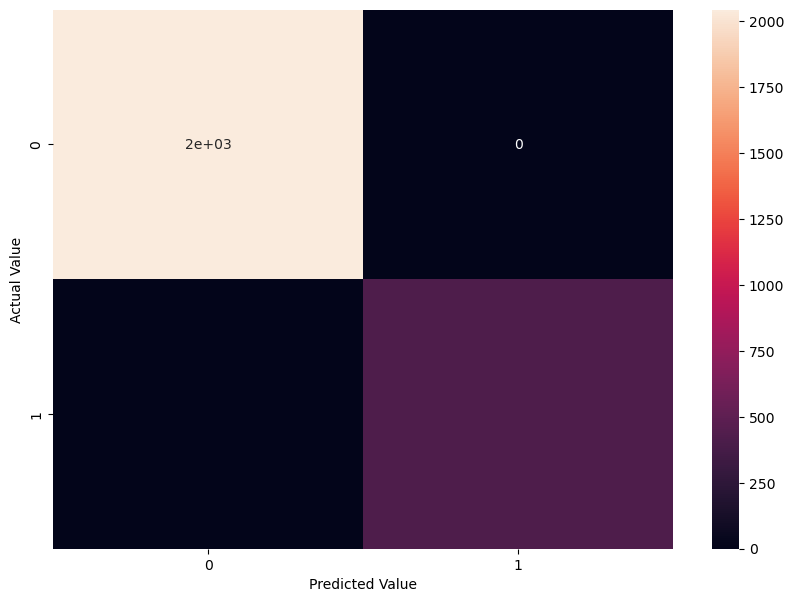

In [18]:
# B. To Generate and Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict)

import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [19]:
# C. Computing the Hold-Out Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_predict)
print("Hold-Out Accuracy:")
print(accuracy)
print(" ")

Hold-Out Accuracy:
1.0
 


In [20]:
# D. Generating the Classification Report
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(Y_test, Y_predict))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2044
        True       1.00      1.00      1.00       422

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466



## Part 5: Perform K-Fold Cross Validation to Assess the ANN Model Performance

In [22]:
# A. To Feature SCale the X Variable Using the StandardScaler

X_standard = X.copy()
X_standard = ss.fit_transform(X_standard)

In [29]:
# B. Building the ANN Classifier Using KerasClassifier
from scikeras.wrappers import KerasClassifier

def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

ann_model = KerasClassifier(model=classifier, batch_size=10, epochs = 50, verbose = 0)


In [30]:
# C. Import the StratifieKFold Class

from sklearn.model_selection import StratifiedKFold


In [31]:
# D. Import the Cross Val Score Class

from sklearn.model_selection import cross_val_score
k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state=0)

In [32]:
# For the Accuracy as Scoring Metrics for the Cross-Validation
accuracies = cross_val_score(estimator=ann_model, X = X_standard, y = Y, cv = k_fold, scoring = "accuracy", n_jobs = -1)
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print('Accuracies of k-folds:', accuracies)
print(" ")
print("Average of the Accuracies of k-folds:", accuracies_average)
print(" ")
print('Standard Deviation of the Accuracies of k-foldsP:', accuracies_standard_deviation)
print(" ")


Accuracies of k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of the Accuracies of k-folds: 1.0
 
Standard Deviation of the Accuracies of k-foldsP: 0.0
 


In [33]:
# For the F1 as Scoring Metrics for the Cross-Validation
f1 =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'f1', n_jobs = -1))
f1_average = f1.mean()
f1__standard_deviation = f1.std()

print('F1-Score of the k-folds:', f1)
print(" ")
print('Average of F1-Score of the k-folds:', f1_average)
print(" ")
print('Standard Deviation of F1-Score of the k-fold:', f1__standard_deviation)
print(' ')

F1-Score of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of F1-Score of the k-folds: 1.0
 
Standard Deviation of F1-Score of the k-fold: 0.0
 


In [34]:
# For the Precision as Scoring Metrics for the Cross-Validation
precision =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'precision', n_jobs = -1))
precision_average = precision.mean()
precision__standard_deviation = precision.std()

print('Precision of the k-folds:', precision)
print(" ")
print('Average of Precision of the k-folds:', precision_average)
print(" ")
print('Standard Deviation of Precision of the k-fold:', precision__standard_deviation)
print(' ')

Precision of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of Precision of the k-folds: 1.0
 
Standard Deviation of Precision of the k-fold: 0.0
 


In [35]:
# For the Recall as Scoring Metrics for the Cross-Validation
recall =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'recall', n_jobs = -1))
recall_average = recall.mean()
recall__standard_deviation = recall.std()

print('Recall of the k-folds:', recall)
print(" ")
print('Average of Recall of the k-folds:', recall_average)
print(" ")
print('Standard Deviation of Recall of the k-fold:', recall__standard_deviation)
print(' ')

Recall of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of Recall of the k-folds: 1.0
 
Standard Deviation of Recall of the k-fold: 0.0
 


In [38]:
# For the Roc-Auc as Scoring Metrics for the Cross-Validation
rocauc =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'roc_auc', n_jobs = -1))
rocauc_average = rocauc.mean()
rocauc__standard_deviation = rocauc.std()

print('ROC-AUC of the k-folds:', rocauc)
print(" ")
print('Average of ROC-AUC of the k-folds:', rocauc_average)
print(" ")
print('Standard Deviation of ROC-AUC of the k-fold:', rocauc__standard_deviation)
print(' ')

ROC-AUC of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of ROC-AUC of the k-folds: 1.0
 
Standard Deviation of ROC-AUC of the k-fold: 0.0
 


### Hold Out Validation

In [39]:
# A. For the Classification Accuracy

from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict)
print('Classification Accuracy: %.4f'
      %classification_accuracy)
print('')


Classification Accuracy: 1.0000



In [40]:
# B. For the Classification Error
classification_error = 1 - classification_accuracy
print('Classification Error: %.4f'
      %classification_error)
print('')

Classification Error: 0.0000



In [41]:
# C. For the Sensitivity, Recall Score, Probablity of Detection, True Positive Rate
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict, average = 'weighted')
print('Sensitivity: %.4f'
      %sensitivity)
print('')

Sensitivity: 1.0000



In [43]:
# G. For the Precision or Positive Predictive Value
from sklearn.metrics import precision_score
precision_score = precision_score(Y_test, Y_predict, average = 'weighted')
print('Precision Score: %.4f'
      %precision_score)
print('')

Precision Score: 1.0000



In [44]:
# H. For the F1-Score
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict, average = 'weighted')
print('F1-Score: %.4f'
      %f1_score)
print('')

F1-Score: 1.0000



# Part 7: Performing Hyperparameter Tuning to Optimized the ANN

### A. Tune First the Batch Size and Epochs

In [45]:
# A.1, Build the ANN Model for the Optimization Process
from scikeras.wrappers import KerasClassifier

def classifier_optimization():
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    classifier_optimization.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, verbose = 0)

In [46]:
# A.2. To Import The GridSearchCV class
from sklearn.model_selection import GridSearchCV

In [47]:
# A.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'batch_size': [50, 100, 150, 200, 250],
              'epochs': [10, 50, 100, 150, 200]}
grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(model=<function classifier_optimization at 0x0000024B9D603EC0>, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [50, 100, 150, 200, 250],
                         'epochs': [10, 50, 100, 150, 200]},
             scoring='accuracy')


In [48]:
# A.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

    mean_test_score  std_test_score                              params
0          0.999757        0.000519    {'batch_size': 50, 'epochs': 10}
1          0.999838        0.000487    {'batch_size': 50, 'epochs': 50}
2          0.999919        0.000243   {'batch_size': 50, 'epochs': 100}
3          1.000000        0.000000   {'batch_size': 50, 'epochs': 150}
4          1.000000        0.000000   {'batch_size': 50, 'epochs': 200}
5          0.995215        0.003233   {'batch_size': 100, 'epochs': 10}
6          0.999838        0.000324   {'batch_size': 100, 'epochs': 50}
7          1.000000        0.000000  {'batch_size': 100, 'epochs': 100}
8          1.000000        0.000000  {'batch_size': 100, 'epochs': 150}
9          0.999919        0.000243  {'batch_size': 100, 'epochs': 200}
10         0.961233        0.043704   {'batch_size': 150, 'epochs': 10}
11         0.999513        0.000973   {'batch_size': 150, 'epochs': 50}
12         1.000000        0.000000  {'batch_size': 150, 'epochs

In [49]:
# A.5. To Identify the Best Accuracy and the Best Features
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters)
print(" ")

Best Accuracy Score:
1.0
 
Best Parameters:
{'batch_size': 50, 'epochs': 150}
 


### B. Tune Next the Optimizer

In [50]:
# B.1, Build the ANN Model for the Optimization Process
from scikeras.wrappers import KerasClassifier

def classifier_optimization(optimizer="sgd"):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    classifier_optimization.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, epochs = 150, batch_size = 50, verbose = 0)

In [51]:
# B.2. To Import The GridSearchCV class
from sklearn.model_selection import GridSearchCV

In [52]:
# B.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'optimizer': ['adam', 'sgd', 'rmsprop', 'adamW', 'adadelta', 'adagrad', 'adamax', 'adafactor', 'aadam', 'ftrl', 'lion', 'Loss Scale Optimizer']}

grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(batch_size=50, epochs=150, model=<function classifier_optimization at 0x0000024B9D600040>, verbose=0),
             n_jobs=-1,
             param_grid={'optimizer': ['adam', 'sgd', 'rmsprop', 'adamW',
                                       'adadelta', 'adagrad', 'adamax',
                                       'adafactor', 'aadam', 'ftrl', 'lion',
                                       'Loss Scale Optimizer']},
             scoring='accuracy')


In [53]:
# B.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)


    mean_test_score  std_test_score                                 params
0          1.000000        0.000000                  {'optimizer': 'adam'}
1          1.000000        0.000000                   {'optimizer': 'sgd'}
2          1.000000        0.000000               {'optimizer': 'rmsprop'}
3          1.000000        0.000000                 {'optimizer': 'adamW'}
4          0.999838        0.000324              {'optimizer': 'adadelta'}
5          1.000000        0.000000               {'optimizer': 'adagrad'}
6          1.000000        0.000000                {'optimizer': 'adamax'}
7          1.000000        0.000000             {'optimizer': 'adafactor'}
8          1.000000        0.000000                 {'optimizer': 'aadam'}
9          1.000000        0.000000                  {'optimizer': 'ftrl'}
10         0.999919        0.000243                  {'optimizer': 'lion'}
11         1.000000        0.000000  {'optimizer': 'Loss Scale Optimizer'}


In [54]:
# B.5. To Identify the Best Accuracy and the Best Features
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters)
print(" ")

Best Accuracy Score:
1.0
 
Best Parameters:
{'optimizer': 'adam'}
 


### C. Tune Next the Optimizer's Learning Rate and Momentum

In [66]:
# C.1. Build the ANN Model for the Optimization Process
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam # Import always yung nahanap na best optimizer sa taas, need lagi iimport, MAGBASED SA LINK KUNG PAANO IIIMPORT AND YUNG DOCUMENTATION NG BAWAT OPTIMIZER

def classifier_optimization(learning_rate, ema_momentum):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    optimizer_setting = Adam(learning_rate = learning_rate, ema_momentum = ema_momentum)
    classifier_optimization.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, epochs = 150, batch_size = 50, learning_rate = 0.001, ema_momentum = 0.99, verbose = 0)


In [67]:
# C.2. To Import The GridSearchCV class
from sklearn.model_selection import GridSearchCV

In [69]:
# C.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1],
              'ema_momentum': [1, 1.5, 2, 3, 0.8, 0.99]}
grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)

c:\Users\Leigh Marasigan\anaconda3-2\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(batch_size=50, ema_momentum=0.99, epochs=150, learning_rate=0.001, model=<function classifier_optimization at 0x0000024B9F36DC60>, verbose=0),
             n_jobs=-1,
             param_grid={'ema_momentum': [1, 1.5, 2, 3, 0.8, 0.99],
                         'learning_rate': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')


In [70]:
# C.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

    mean_test_score  std_test_score  \
0          1.000000        0.000000   
1          1.000000        0.000000   
2          0.999676        0.000538   
3          0.845255        0.000324   
4          1.000000        0.000000   
5          1.000000        0.000000   
6          0.999757        0.000730   
7          0.845255        0.000324   
8          1.000000        0.000000   
9          1.000000        0.000000   
10         0.999919        0.000243   
11         0.845255        0.000324   
12         1.000000        0.000000   
13         1.000000        0.000000   
14         0.999838        0.000487   
15         0.845337        0.000372   
16         1.000000        0.000000   
17         1.000000        0.000000   
18         0.999594        0.000748   
19         0.845255        0.000324   
20         1.000000        0.000000   
21         1.000000        0.000000   
22         0.999432        0.000963   
23         0.845255        0.000324   

                        

In [71]:
# C.5. To Identify the Best Accuracy and the Best Features
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters)
print(" ")


Best Accuracy Score:
1.0
 
Best Parameters:
{'ema_momentum': 1, 'learning_rate': 0.001}
 


### D. Tuning of Network's Weight Initialization

In [75]:
# D.1. Build the ANN Model for the Optimization Process
def classifier_optimization(kernel_initializer):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = kernel_initializer, activation = 'relu', input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = kernel_initializer, activation = 'relu'))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = kernel_initializer, activation = 'sigmoid'))
    optimizer_setting = Adam(learning_rate = 0.001, ema_momentum = 1)
    classifier_optimization.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, kernel_initializer = 'golorot_uniform', epochs = 150, batch_size = 50, verbose = 0) # Nawala na learning rate and momentum kasi nilagay na sa optimizer settings


In [76]:
# D.2. To Import The GridSearchCV class
from sklearn.model_selection import GridSearchCV


In [77]:
# D.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'kernel_initializer': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_uniform', 'glorot_normal', 'he_normal', 'he_uniform']}
grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(batch_size=50, epochs=150, kernel_initializer='golorot_uniform', model=<function classifier_optimization at 0x0000024B9D76D3A0>, verbose=0),
             n_jobs=-1,
             param_grid={'kernel_initializer': ['uniform', 'lecun_uniform',
                                                'normal', 'zero',
                                                'glorot_uniform',
                                                'glorot_normal', 'he_normal',
                                                'he_uniform']},
             scoring='accuracy')


In [78]:
# D.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

   mean_test_score  std_test_score                                    params
0         1.000000        0.000000         {'kernel_initializer': 'uniform'}
1         1.000000        0.000000   {'kernel_initializer': 'lecun_uniform'}
2         1.000000        0.000000          {'kernel_initializer': 'normal'}
3         0.845255        0.000324            {'kernel_initializer': 'zero'}
4         1.000000        0.000000  {'kernel_initializer': 'glorot_uniform'}
5         1.000000        0.000000   {'kernel_initializer': 'glorot_normal'}
6         1.000000        0.000000       {'kernel_initializer': 'he_normal'}
7         1.000000        0.000000      {'kernel_initializer': 'he_uniform'}


In [79]:
# D.5. To Identify the Best Accuracy and the Best Features
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters)
print(" ")


Best Accuracy Score:
1.0
 
Best Parameters:
{'kernel_initializer': 'uniform'}
 


### E. Tuning of Neuron Activation Function

In [83]:
# E.1. Build the ANN Model for the Optimization Process

def classifier_optimization(activation1, activation2, activation3):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = 'uniform', activation = activation1, input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = 'uniform', activation = activation2))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = 'uniform', activation = activation3))
    optimizer_setting = Adam(learning_rate = 0.001, ema_momentum = 1)
    classifier_optimization.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, activation1 = 'softmax', activation2 = 'softmax', activation3 = 'softmax', epochs = 150, batch_size = 50, verbose = 0) # Nawala na learning rate and momentum kasi nilagay na sa optimizer settings


In [84]:
# E.2. To Import The GridSearchCV class
from sklearn.model_selection import GridSearchCV

In [ ]:
# E.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'activation1': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
              'activation2': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
              'activation3': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']}

grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)


In [ ]:
# E.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

In [ ]:
# E.5. To Identify the Best Accuracy and the Best Features
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters)
print(" ")
